In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pf=pd.read_csv('C:\My Download\Automobile_data.csv')

In [4]:
pf.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
pf.replace({u"?": np.nan}, inplace=True)

In [6]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Observations

1- normalized-losses has many null values so we will see if it affects the price?

2- num-of-doors, bore, stroke, horsepower, peak-rpm and price have few null values

3- bore, stroke, horsepower, peak-rpm and price need to be turned to numeric

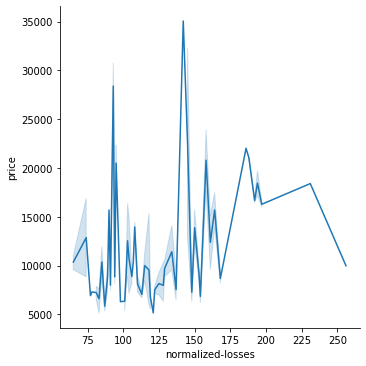

In [7]:
#3- Turn the columns to numeric 

pf[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = pf[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].apply(pd.to_numeric)

#To see if normalized-losses affects the price

sns.relplot(x="normalized-losses",y="price",data=pf,kind="line")

normalized-losses has many null values doesn't seem (from plots) to affect hte price so we will drop this col.

In [8]:
#1- Drop normalized-losses 

pf=pf.drop(['normalized-losses'], axis=1)

In [9]:
pf.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
pf.describe(include=['O'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [11]:
pf['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

#### Observations

Few cars have high price(45400)

There are outliers in many cols like: 'compression-ratio' and 'horsepower'

-

Most of the cars(67) have symboling = 0 and (54) have symboling = 1

32 of the cars are made by 'toyota'

202 of the engine-location are the (front), only 3 engines are in (rear) so we can neglect this col.

In [12]:
#Drop engine-location col.

pf=pf.drop(['engine-location'], axis=1)

In [13]:
#To show null values in the data set

pf[pf.isnull().any(axis=1)].T

,9,27,44,45,55,56,57,58,63,129,130,131
symboling,0,1,1,0,3,3,3,3,0,1,0,2
make,audi,dodge,isuzu,isuzu,mazda,mazda,mazda,mazda,mazda,porsche,renault,renault
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas,gas,gas
aspiration,turbo,turbo,std,std,std,std,std,std,std,std,std,std
num-of-doors,two,NaN,two,four,two,two,two,two,NaN,two,four,two
body-style,hatchback,sedan,sedan,sedan,hatchback,hatchback,hatchback,hatchback,sedan,hatchback,wagon,hatchback
drive-wheels,4wd,fwd,fwd,fwd,rwd,rwd,rwd,rwd,fwd,rwd,fwd,fwd
wheel-base,99.5,93.7,94.5,94.5,95.3,95.3,95.3,95.3,98.8,98.4,96.1,96.1
length,178.2,157.3,155.9,155.9,169,169,169,169,177.8,175.7,181.5,176.8
width,67.9,63.8,63.6,63.6,65.7,65.7,65.7,65.7,66.5,72.3,66.5,66.6


There are:
- 2 nulls in num-of-doors
- 4 nulls in bore
- 4 nulls in stroke
- 2 nulls in horsepower
- 2 nulls in peak-rpm
- 4 nulls in price

We will drop them :) 

In [14]:
#Drop all nulls 

pf=pf.dropna()

------------------------------------------------------------------------

-------------------------------------------------------------

#### Find relations between features :

* city-mpg and highway-mpg:

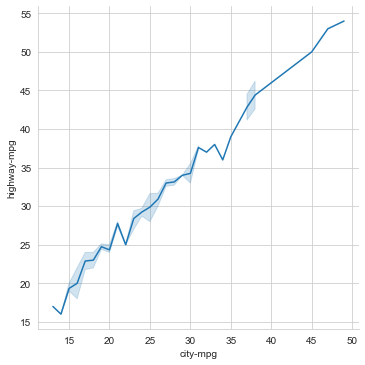

In [15]:
sns.set_style("whitegrid")
sns.relplot(x="city-mpg",y="highway-mpg",data=pf,kind="line")
sns.set_style("white")

There is a strong relation between city-mpg and highway-mpg

Wee can notice that (highway-mpg) is almost = (city-mpg) + 5

we can use just one of them or find the mean of them in a col. called (mpg)

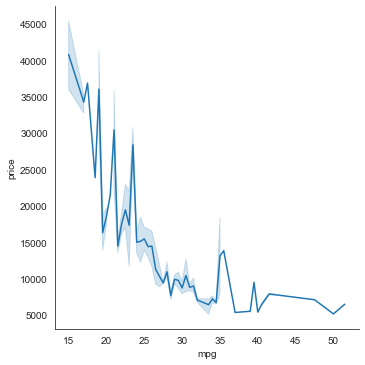

In [20]:
pf['mpg']=(pf['highway-mpg']+pf['city-mpg'])/2
sns.relplot(x="mpg",y="price",data=pf,kind="line")

The price decreases when the mpg increases

--------------------------------------

-------------------------------------------

* symboling:

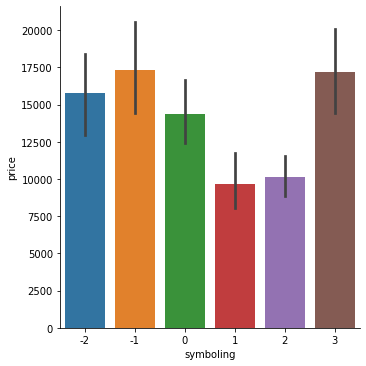

In [23]:
sns.catplot(x="symboling",y="price",data=pf,kind="bar")

We see that cars with symboling = 1 and 2 have the lowest prices 

and cars with symboling = -1 and 3 have the highest prices 

In [64]:
pd.crosstab(pf["make"],pf["symboling"])

symboling,-2,-1,0,1,2,3
make,,,,,,
alfa-romero,0,0,0,1,0,2
audi,0,0,0,3,3,0
bmw,0,0,6,1,1,0
chevrolet,0,0,1,1,1,0
dodge,0,1,0,6,0,1
honda,0,0,7,4,2,0
isuzu,0,0,1,0,1,0
jaguar,0,0,3,0,0,0
mazda,0,0,5,7,0,0


----------------------

-----------------------------------------

* Make:

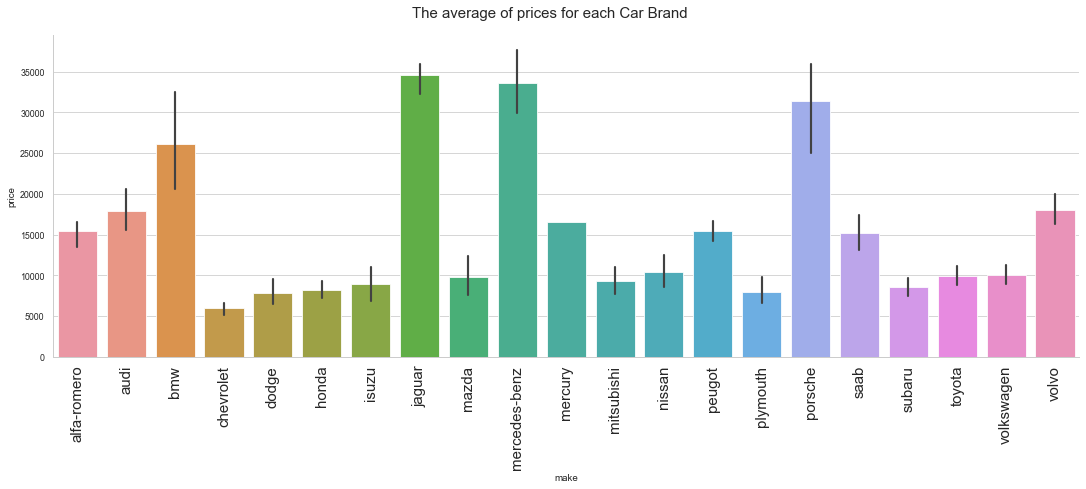

In [71]:
sns.set_context("paper")
sns.set_style("whitegrid")
g=sns.catplot(x="make",y="price",data=pf,kind="bar",height=5,aspect=3)
g.fig.suptitle("The average of prices for each Car Brand",y=1.05,fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.show()

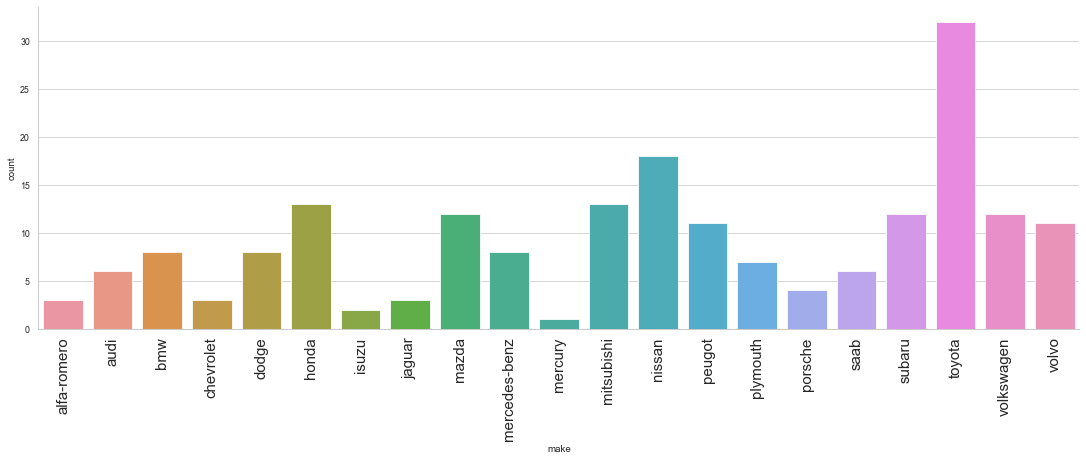

In [48]:
sns.catplot(x="make",data=pf,kind="count",height=5,aspect=3)
plt.xticks(rotation=90,fontsize=15)
plt.show()

We see that the biggest number of cars are from Toyota then Nissan then Mitsubishi and Handa

In [72]:
sns.set_style("white")
sns.set_context("paper")

------------------------------

---------------------------------------

* fuel-system and fuel-type :

In [114]:
pd.crosstab(pf["fuel-system"],pf["fuel-type"])

fuel-type,diesel,gas
fuel-system,,
1bbl,0,11
2bbl,0,64
idi,19,0
mfi,0,1
mpfi,0,88
spdi,0,9
spfi,0,1


The fuel-type is completely dependent on the fuel-system:

- All fuel systems require gas 
- exepect idi fuel systems >> require diesel

So, we can get rid of one of them.

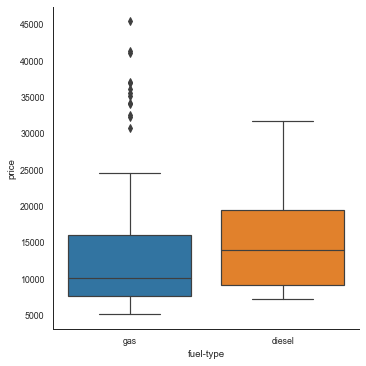

In [134]:
sns.catplot(x="fuel-type",y="price",data=pf,kind="box")

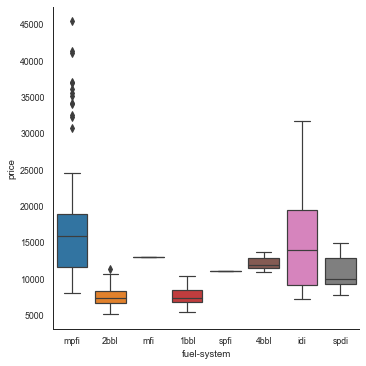

In [135]:
sns.catplot(x="fuel-system",y="price",data=pf,kind="box")

- We can see that cars with (diesel fuel) are more expensive than that with gas fuel 

and so: cars with idi fuel system (which require diesel fuel) are more expensive than the others.

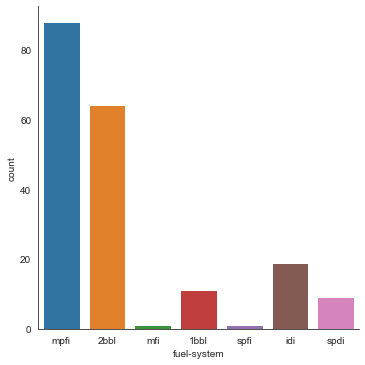

In [61]:
sns.catplot(x="fuel-system",data=pf,kind="count")

- Most of the cars have the folloeing fuel systems:

mpfi (which is the most expensive gas system) 

and 2bbl (which is the cheapest gas system) 

--------------------------

----------------------------------------------

* aspiration:

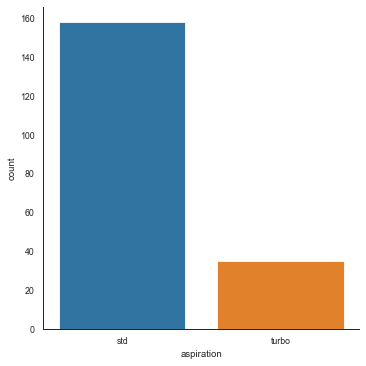

In [77]:
sns.catplot(x="aspiration",data=pf,kind="count")

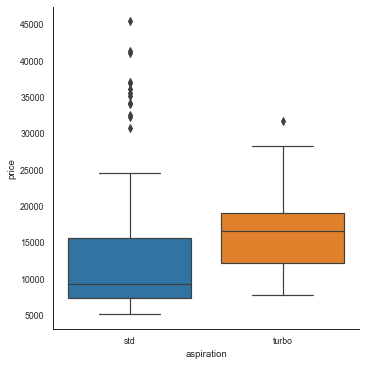

In [97]:
sns.catplot(x="aspiration",y="price",data=pf,kind="box")

Cars with turbo aspiration are more expensive than cars with std aspiration

----------------------------------

-------------------------------

* num-of-doors:

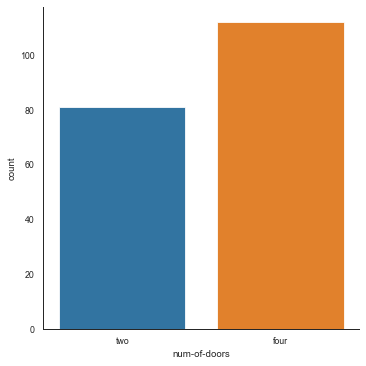

In [78]:
sns.catplot(x="num-of-doors",data=pf,kind="count")

In [79]:
pd.crosstab(pf["body-style"],pf["num-of-doors"])

num-of-doors,four,two
body-style,,
convertible,0,6
hardtop,0,8
hatchback,10,53
sedan,78,14
wagon,24,0


There is a relation between num-of-doors and body-style

---------------------------------------------

--------------------------------------------

* body-style:

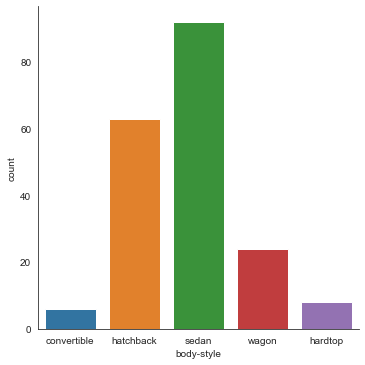

In [27]:
sns.catplot(x="body-style",data=pf,kind="count")

In [17]:
pd.crosstab(pf["make"],pf["body-style"])

body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,2,0,1,0,0
audi,0,0,0,5,1
bmw,0,0,0,8,0
chevrolet,0,0,2,1,0
dodge,0,0,5,2,1
honda,0,0,7,5,1
isuzu,0,0,1,1,0
jaguar,0,0,0,3,0
mazda,0,0,6,6,0


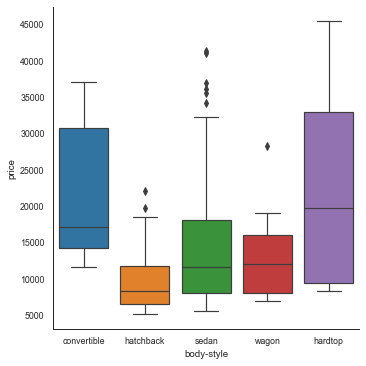

In [104]:
sns.catplot(x="body-style",y="price",data=pf,kind="box")

-----------------------------------------

------------------------------------------------------------

* drive-wheels:

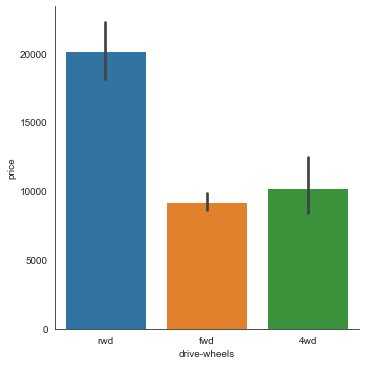

In [33]:
sns.catplot(x="drive-wheels",y="price",data=pf,kind="bar")

In [82]:
pd.crosstab(pf["body-style"],pf["drive-wheels"])

drive-wheels,4wd,fwd,rwd
body-style,,,
convertible,0,1,5
hardtop,0,1,7
hatchback,1,48,14
sedan,3,53,36
wagon,4,11,9


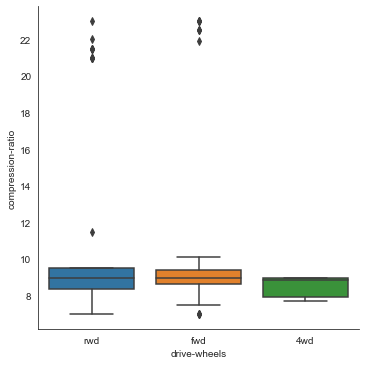

In [35]:
sns.catplot(x="drive-wheels",y="compression-ratio",data=pf, kind="box")

<h6> There are outliers

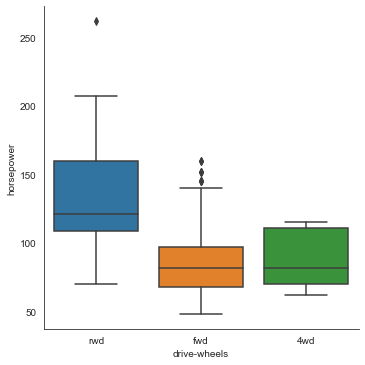

In [40]:
sns.catplot(x="drive-wheels",y="horsepower",data=pf, kind="box")

-----------------------------------

------------------------------------------------

* engine-type:

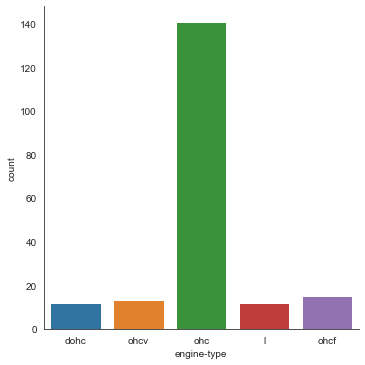

In [44]:
sns.catplot(x="engine-type",data=pf,kind="count")

Most of engines are from chc type

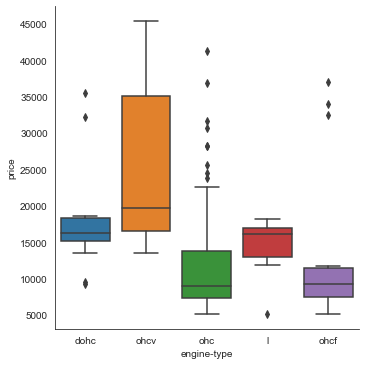

In [48]:
sns.catplot(x="engine-type",y="price",data=pf,kind="box")

In [68]:
#Relation between engine-type and fuel-system

pd.crosstab(pf["fuel-system"],pf["engine-type"])

engine-type,dohc,l,ohc,ohcf,ohcv
fuel-system,,,,,
1bbl,0,0,11,0,0
2bbl,0,1,55,8,0
idi,0,5,14,0,0
mfi,0,0,1,0,0
mpfi,12,6,50,7,13
spdi,0,0,9,0,0
spfi,0,0,1,0,0


-----------------------------------------

----------------------------------------------

* num-of-cylinders and num-of-cylinders:

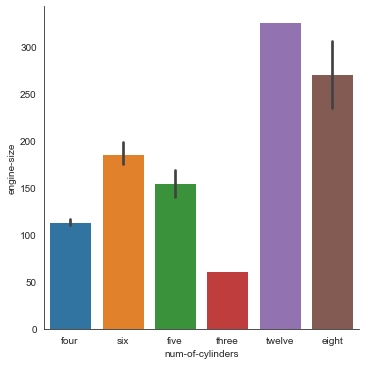

In [49]:
sns.catplot(x="num-of-cylinders",y="engine-size",data=pf,kind="bar")

The engine-size increases with the num-of-cylinders

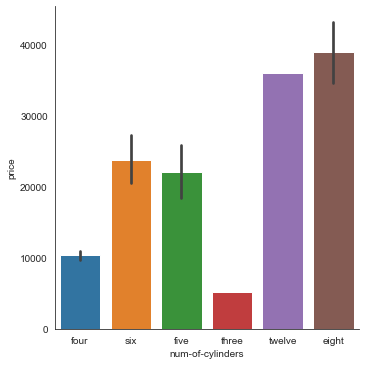

In [53]:
sns.catplot(x="num-of-cylinders",y="price",data=pf,kind="bar")

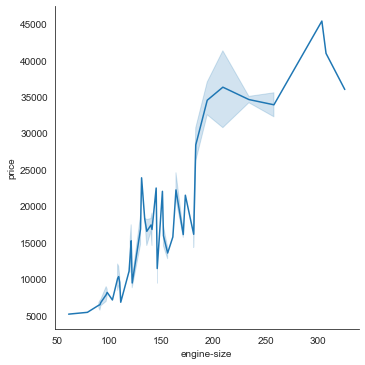

In [51]:
sns.relplot(x="engine-size",y="price",data=pf,kind="line")

The average of car price increases with the num-of-cylinders as the engine-size 

but cars with num-of-cylinders = 8 are more expensive than that with num-of-cylinders = 12

-------------------

-----------------------------------------------------------------------------

* wheel-base:

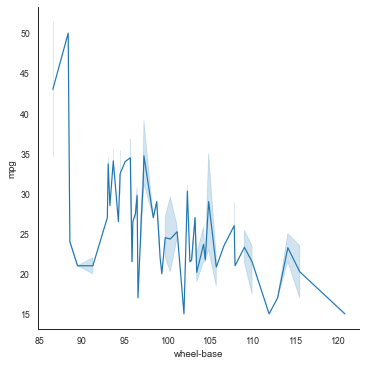

In [74]:
sns.relplot(x="wheel-base",y="mpg",data=pf,kind="line")

Not strong relaion but we can notice that when the wheel-base increases, the mpg decreases.

-------------------------

--------------------------------

* length, width and height:

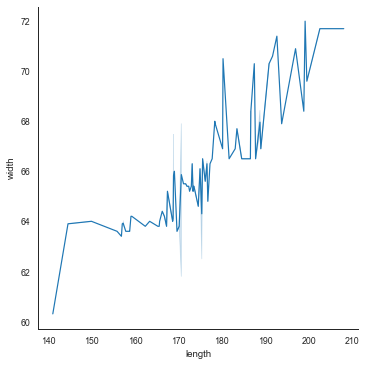

In [87]:
sns.relplot(x="length",y="width",data=pf,kind="line")

As there is a relation between length and width

So we can get the area in a new col. and deal with it 

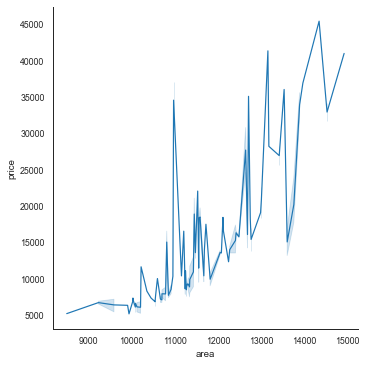

In [88]:
pf['area']=pf["length"]*pf["width"]
sns.relplot(x="area",y="price",data=pf,kind="line")

When the car area increases, the price increases

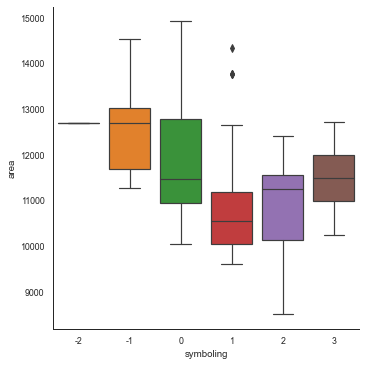

In [90]:
sns.catplot(x="symboling",y="area",data=pf,kind="box")

The area affects the symboling

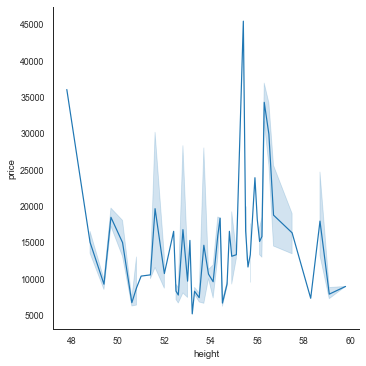

In [92]:
sns.relplot(x="height",y="price",data=pf,kind="line")

With Area, the price increases

but with Hight, it doesn't.

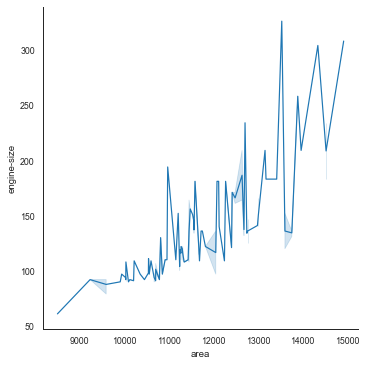

In [93]:
sns.relplot(x="area",y="engine-size",data=pf,kind="line")

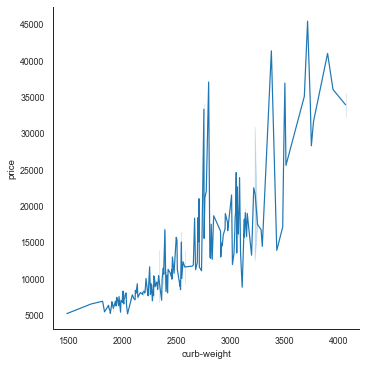

In [180]:
sns.relplot(x="curb-weight",y="price",data=pf,kind="line")

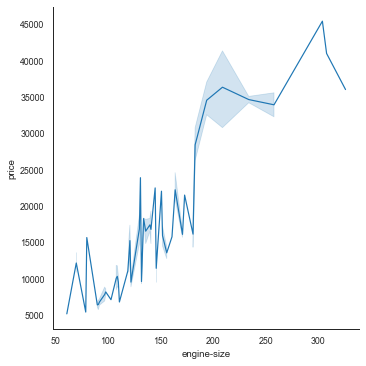

In [181]:
sns.relplot(x="engine-size",y="price",data=pf,kind="line")

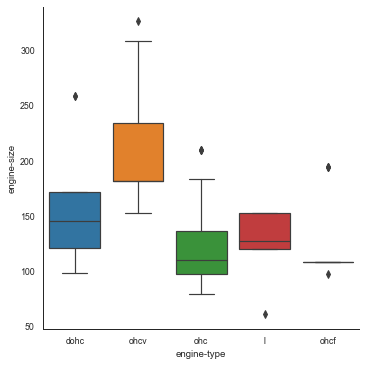

In [96]:
sns.catplot(x="engine-type",y="engine-size",data=pf,kind="box")